In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image

scan_jpg = matplotlib.image.imread("2023-05-18-wingdings-ocr.ipynb-assets/scan.jpg")

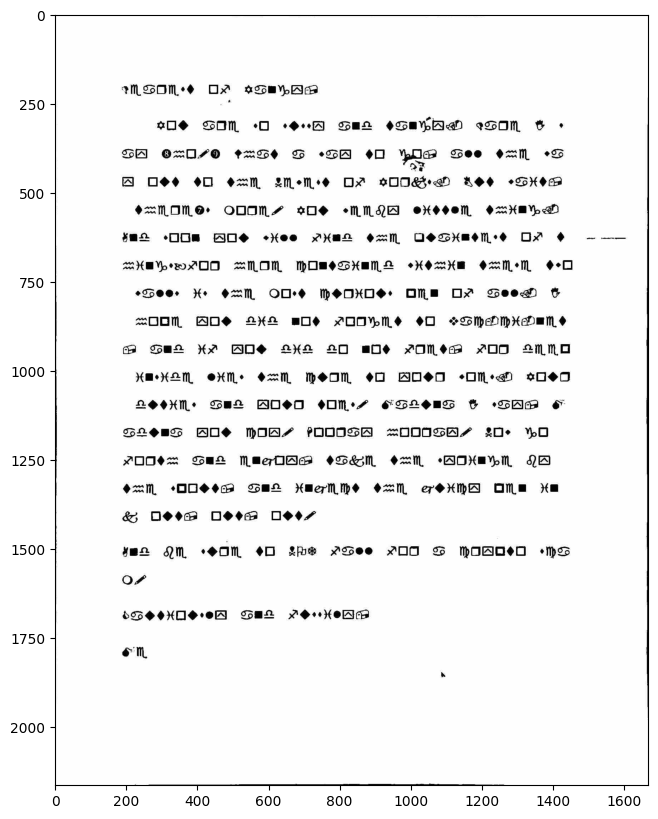

In [276]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(scan_jpg, cmap="gray")

In [277]:
scan_jpg.shape

(2164, 1667)

In [278]:
scan_jpg

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

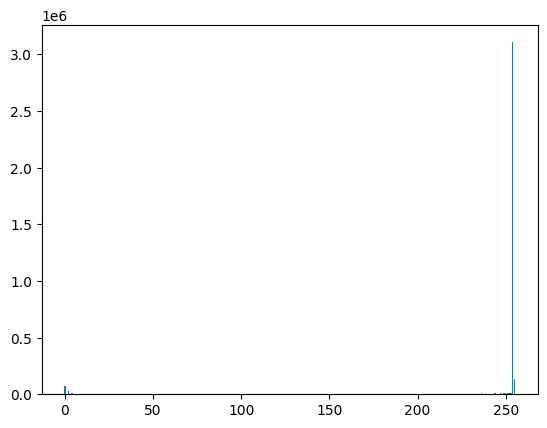

In [ ]:
scan_cnts = [0] * 256
for i in scan_jpg.flatten():
    scan_cnts[int(i)] += 1

plt.bar(x=[i for i in range(256)], height=scan_cnts)
plt.show()

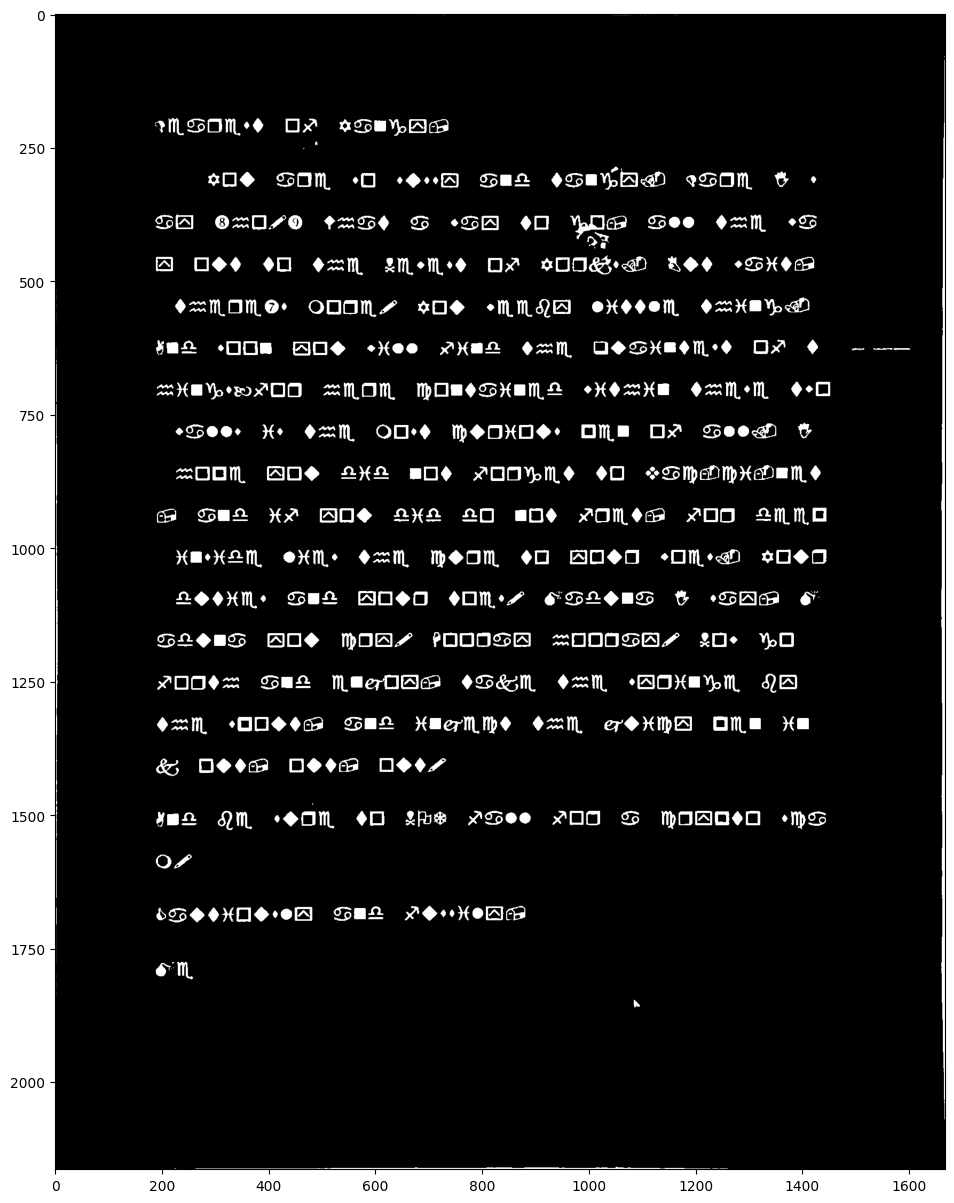

In [280]:
scan = scan_jpg < 128

fig = plt.figure(figsize=(15, 15))
plt.imshow(scan, cmap="gray")
plt.show()

In [315]:
import numpy as np

rows = np.mean(scan, axis=1) * 256
rows.shape

(2164,)

In [316]:
rows

array([ 92.14157169,   8.9070186 ,   0.        , ...,  24.4175165 ,
       101.35572885, 152.80143971])

In [317]:
import plotly.express as px

row_cnts = np.zeros((256,))
for i in rows:
    row_cnts[int(i)] += 1

row_cnts.shape

(256,)

In [318]:
px.bar(row_cnts)

In [331]:
active_rows = rows > 4

active_rows.shape

(2164,)

In [332]:
active_rows

array([ True,  True, False, ...,  True,  True,  True])

In [333]:
np.sum(active_rows)

624

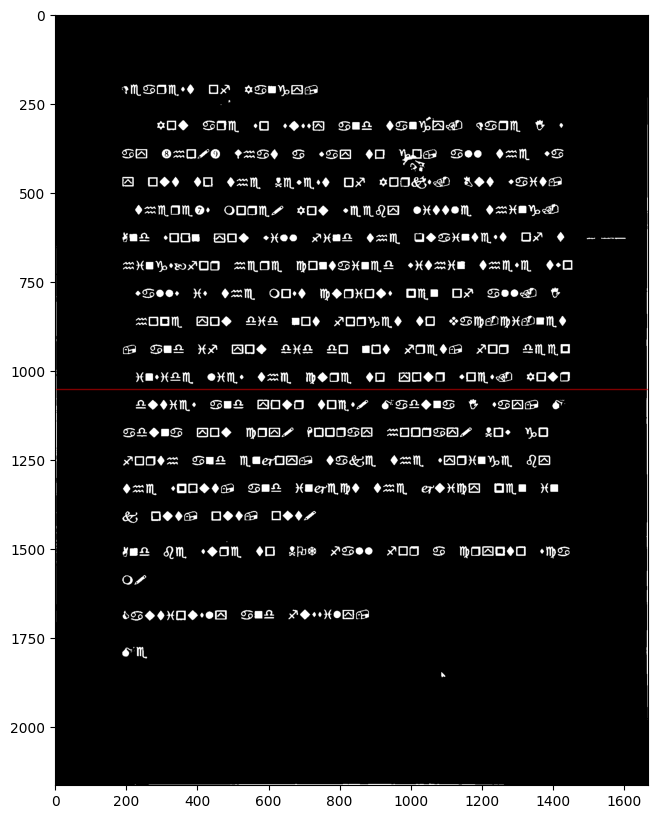

In [334]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(scan, cmap="gray")
plt.axhline(y=1050, color="#ff000080", linewidth=1)

C:\Users\0\AppData\Local\Temp\ipykernel_6896\2381572984.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



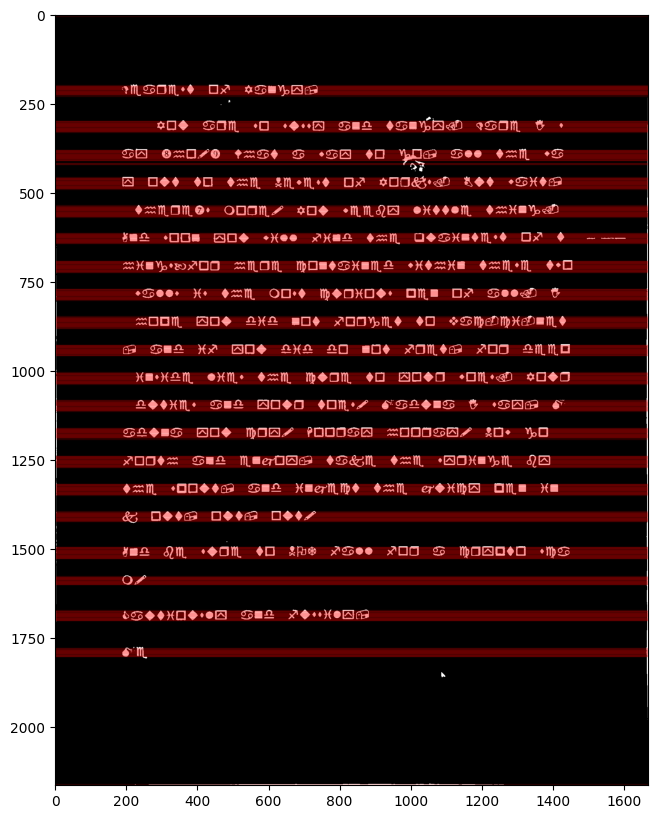

In [335]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(scan, cmap="gray")
for i in range(len(active_rows)):
    if active_rows[i]:
        plt.axhline(y=i, color="#ff000020", linewidth=1)
fig.show()

In [542]:
line_ranges = [[-1000, -1000]]
for i in range(len(active_rows)):
    if not active_rows[i]:
        continue
    if i - line_ranges[-1][1] < 5:
        line_ranges[-1][1] = i
    else:
        line_ranges.append([i, i])

line_ranges = np.array(line_ranges[1:])
line_ranges.shape

(23, 2)

In [543]:
line_ranges

array([[   0,    1],
       [ 196,  225],
       [ 296,  327],
       [ 377,  407],
       [ 415,  418],
       [ 455,  487],
       [ 534,  566],
       [ 611,  640],
       [ 689,  721],
       [ 768,  799],
       [ 846,  878],
       [ 925,  955],
       [1003, 1035],
       [1081, 1111],
       [1159, 1189],
       [1237, 1269],
       [1316, 1347],
       [1394, 1421],
       [1493, 1526],
       [1576, 1599],
       [1672, 1700],
       [1778, 1801],
       [2161, 2163]])

C:\Users\0\AppData\Local\Temp\ipykernel_6896\1475551830.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



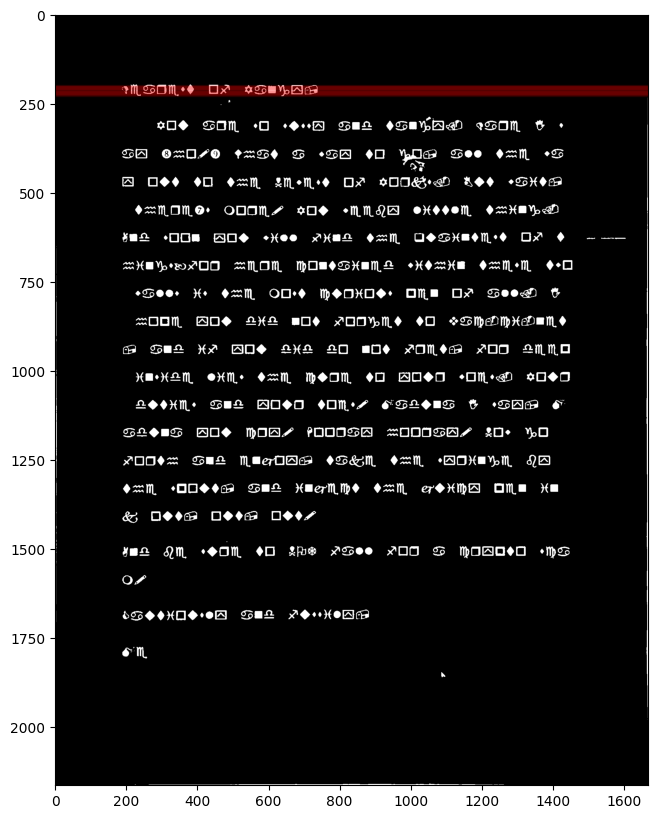

In [ ]:
def show_line(x):
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(scan, cmap="gray")
    for i in range(line_ranges[x][0], line_ranges[x][1] + 1):
        plt.axhline(y=i, color="#ff000020", linewidth=1)
    fig.show()


show_line(1)

C:\Users\0\AppData\Local\Temp\ipykernel_6896\1475551830.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



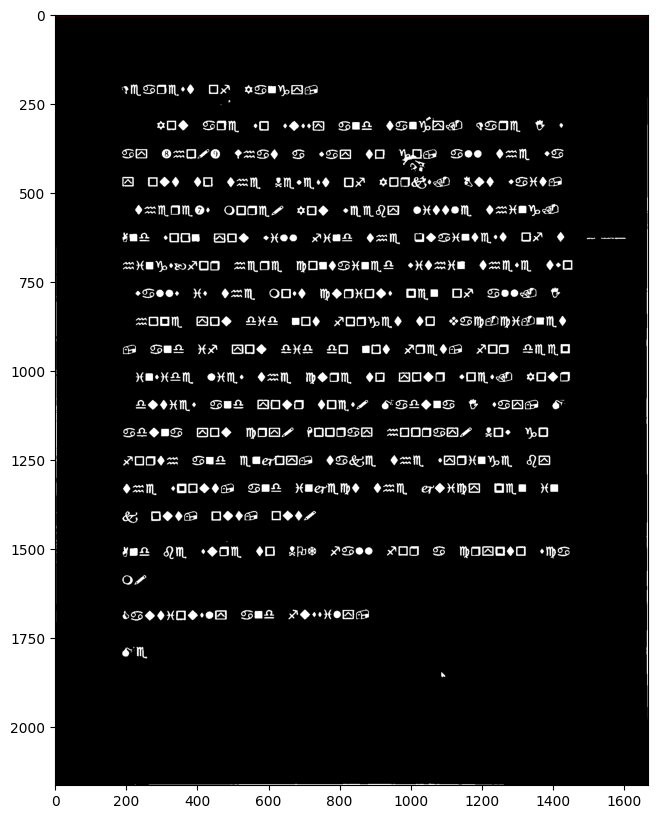

In [545]:
show_line(0)

C:\Users\0\AppData\Local\Temp\ipykernel_6896\1475551830.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



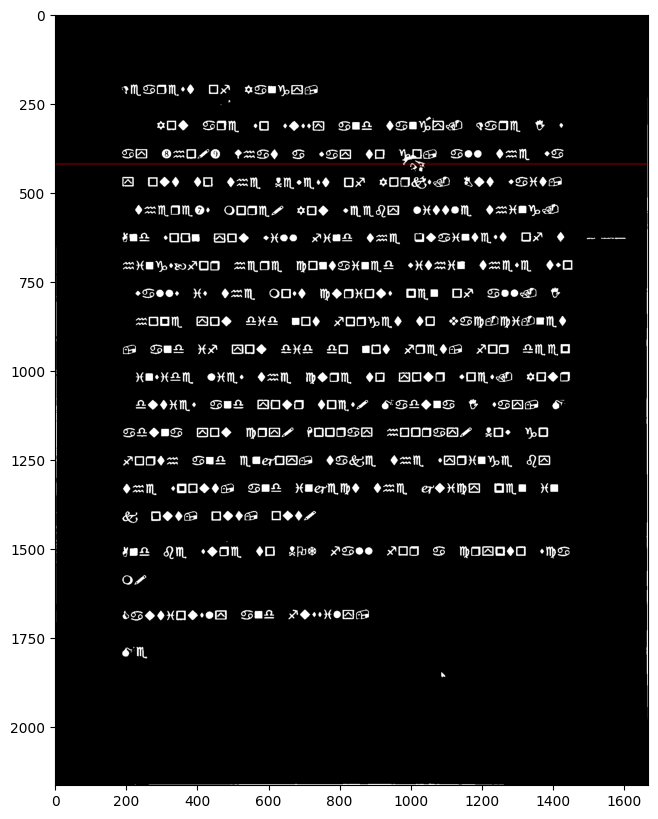

In [546]:
show_line(4)

C:\Users\0\AppData\Local\Temp\ipykernel_6896\1475551830.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



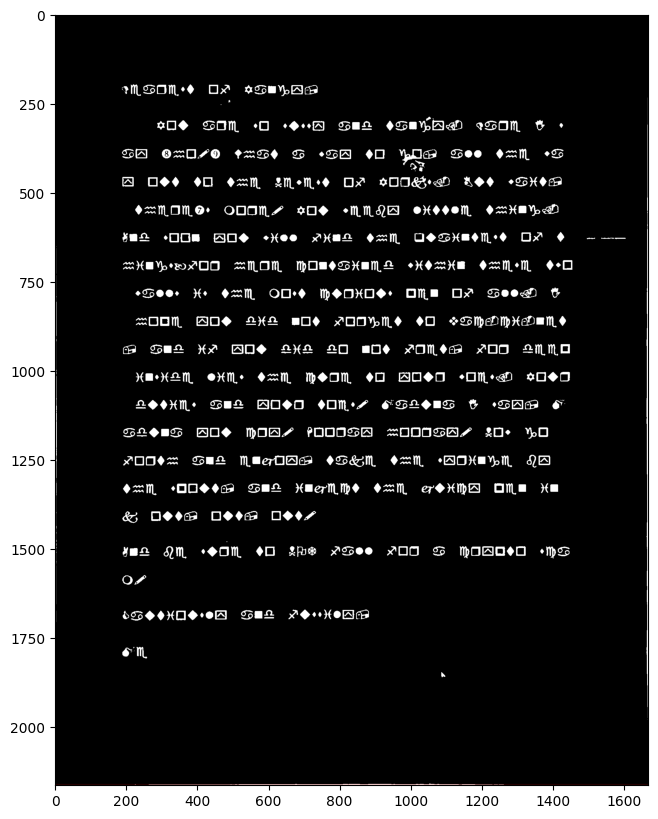

In [547]:
show_line(-1)

C:\Users\0\AppData\Local\Temp\ipykernel_6896\1475551830.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



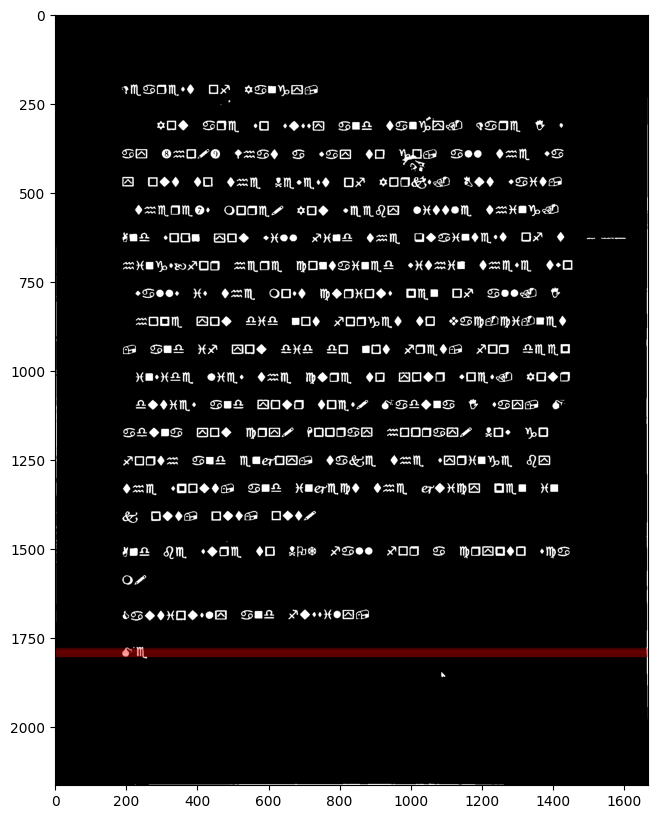

In [548]:
show_line(-2)

In [549]:
line_ranges = np.delete(line_ranges, -1, axis=0)
line_ranges = np.delete(line_ranges, 4, axis=0)
line_ranges = np.delete(line_ranges, 0, axis=0)

line_ranges[-1][1] += 5
line_ranges.shape

(20, 2)

C:\Users\0\AppData\Local\Temp\ipykernel_6896\1601629329.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



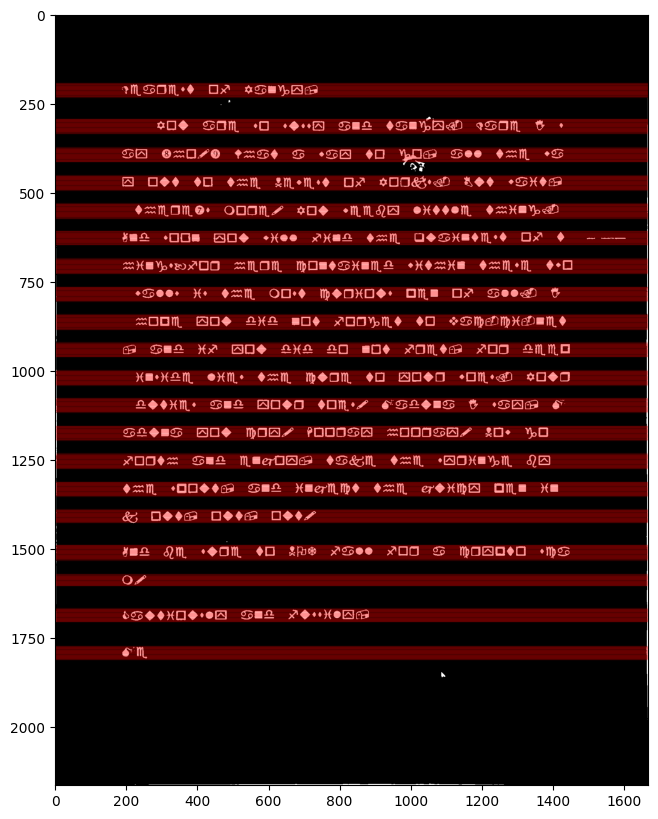

In [550]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(line_ranges)):
    plt.imshow(scan, cmap="gray")
    for j in range(line_ranges[i][0] - 6, line_ranges[i][1] + 4):
        plt.axhline(y=j, color="#ff000020", linewidth=1)
    fig.show()

In [ ]:
line_pixels = []
for i in range(len(line_ranges)):
    line_pixels.append(np.array(scan[line_ranges[i][0] - 6 : line_ranges[i][1] + 4]))

print([line_pixels[i].shape[0] for i in range(len(line_pixels))])

[39, 41, 40, 42, 42, 39, 42, 41, 42, 40, 42, 40, 40, 42, 41, 37, 43, 33, 38, 38]


In [552]:
l_vert_means = np.mean(line_pixels[0], axis=0) * 255
l_vert_means.shape

(1667,)

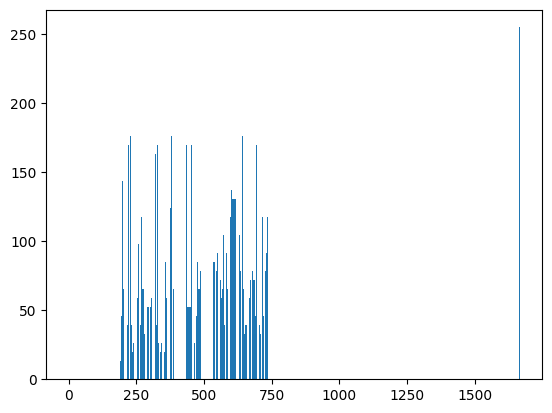

In [553]:
plt.bar(x=[i for i in range(l_vert_means.shape[0])], height=l_vert_means)
plt.show()

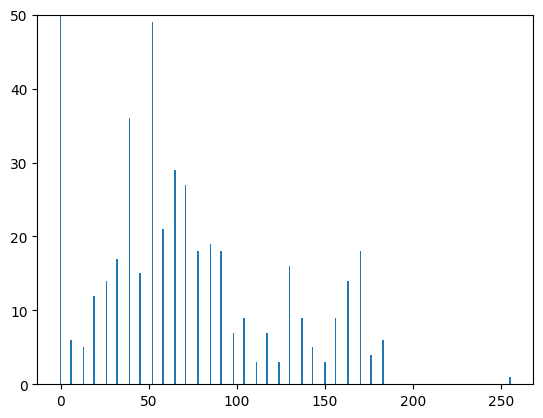

In [554]:
v_mean_cnts = [0] * 256
for i in l_vert_means:
    v_mean_cnts[int(i)] += 1

plt.bar(x=[i for i in range(256)], height=v_mean_cnts)
plt.ylim((0, 50))
plt.show()

In [555]:
np.sum(l_vert_means > 2)

400

In [556]:
vlines = []
for i in range(len(line_pixels)):
    vlines.append([])
    vmean = np.mean(line_pixels[i], axis=0) * 255
    for j in range(len(vmean)):
        if j < 150 or j > 1450:
            continue
        if vmean[j] > 2:
            vlines[i].append(j)
    vlines[-1] = np.array(vlines[-1])

[len(vlines[i]) for i in range(len(vlines))]

[398,
 709,
 782,
 784,
 838,
 784,
 883,
 747,
 836,
 792,
 801,
 804,
 839,
 840,
 816,
 377,
 773,
 62,
 507,
 62]

In [557]:
line_pixels

[array([[False, False, False, ..., False, False,  True],
        [False, False, False, ..., False, False,  True],
        [False, False, False, ..., False, False,  True],
        ...,
        [False, False, False, ..., False,  True,  True],
        [False, False, False, ..., False,  True,  True],
        [False, False, False, ..., False,  True,  True]]),
 array([[ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        ...,
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True]]),
 array([[ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        ...,
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  Tr

In [558]:
vlines

[array([188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
        201, 202, 203, 204, 205, 212, 213, 214, 215, 216, 217, 218, 219,
        220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
        233, 234, 235, 236, 237, 238, 239, 240, 248, 249, 250, 251, 252,
        253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
        266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278,
        279, 280, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
        297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
        310, 311, 312, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
        328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
        341, 342, 343, 344, 345, 346, 347, 354, 355, 356, 357, 358, 359,
        360, 361, 362, 363, 370, 371, 372, 373, 374, 375, 376, 377, 378,
        379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 432, 433,
        434, 435, 436, 437, 438, 439, 440, 441, 442

In [559]:
vline_ranges = []
for i in range(len(vlines)):
    vline_ranges.append([[-1000, -1000]])
    for j in vlines[i]:
        if j - vline_ranges[i][-1][1] <= 1:
            vline_ranges[i][-1][1] = j
        else:
            if vline_ranges[i][-1][1] - vline_ranges[i][-1][0] < 5:
                vline_ranges[i].pop()
            vline_ranges[i].append([j, j])
    vline_ranges[i] = np.array(vline_ranges[i])

In [560]:
vline_ranges[0]

array([[188, 205],
       [212, 240],
       [248, 280],
       [286, 312],
       [318, 347],
       [354, 363],
       [370, 389],
       [432, 457],
       [464, 490],
       [533, 553],
       [560, 592],
       [598, 619],
       [625, 657],
       [663, 695],
       [701, 736]])

In [561]:
line_ranges[0]

array([196, 225])

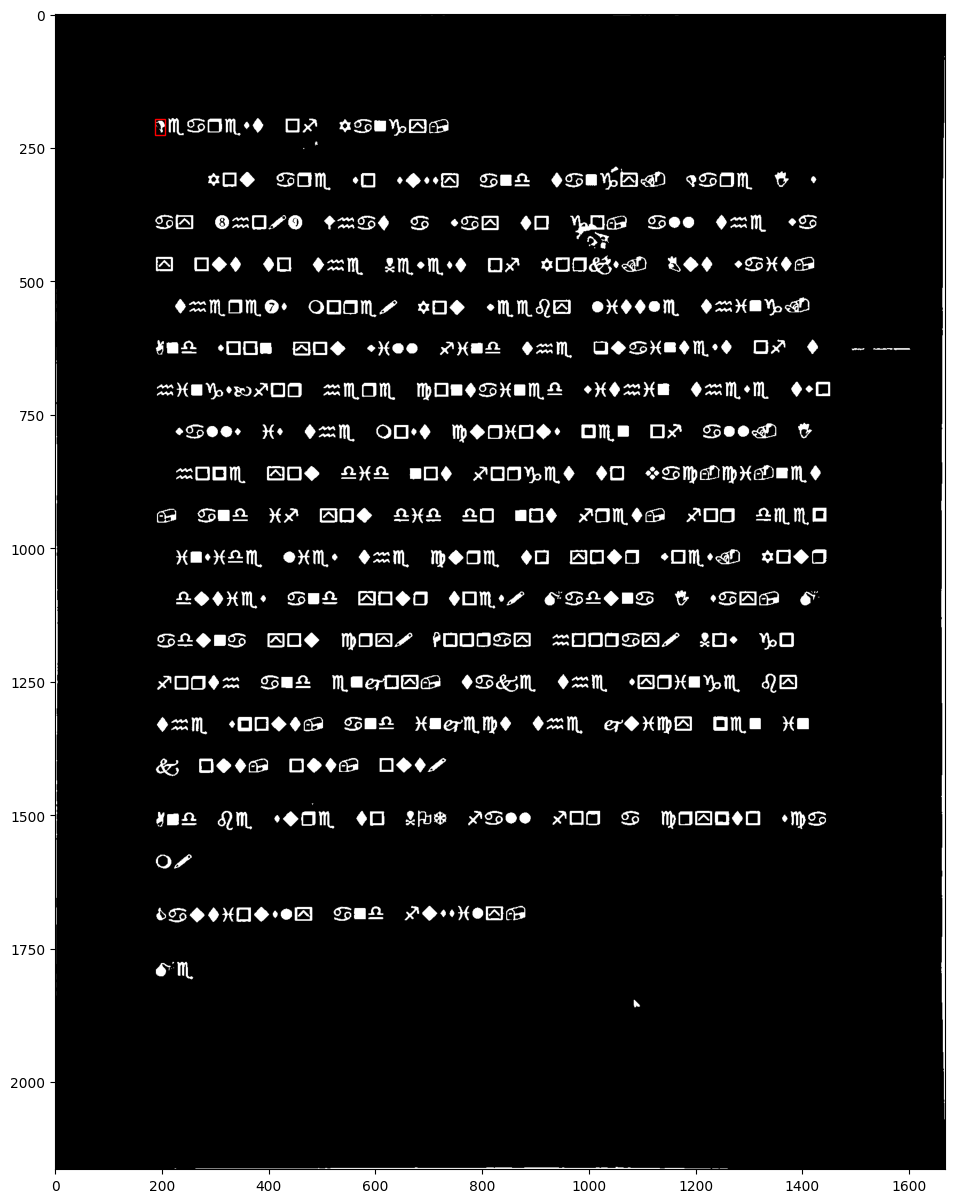

In [ ]:
from matplotlib.patches import Rectangle


def outline_char(line, idx):
    fig = plt.figure(figsize=(15, 15))
    plt.imshow(scan, cmap="gray")
    ax = plt.gca()
    rect = Rectangle(
        (vline_ranges[line][idx][0], line_ranges[line][0]),
        vline_ranges[line][idx][1] - vline_ranges[line][idx][0],
        line_ranges[line][1] - line_ranges[line][0],
        linewidth=1,
        edgecolor="r",
        facecolor="none",
    )
    ax.add_patch(rect)


outline_char(0, 0)

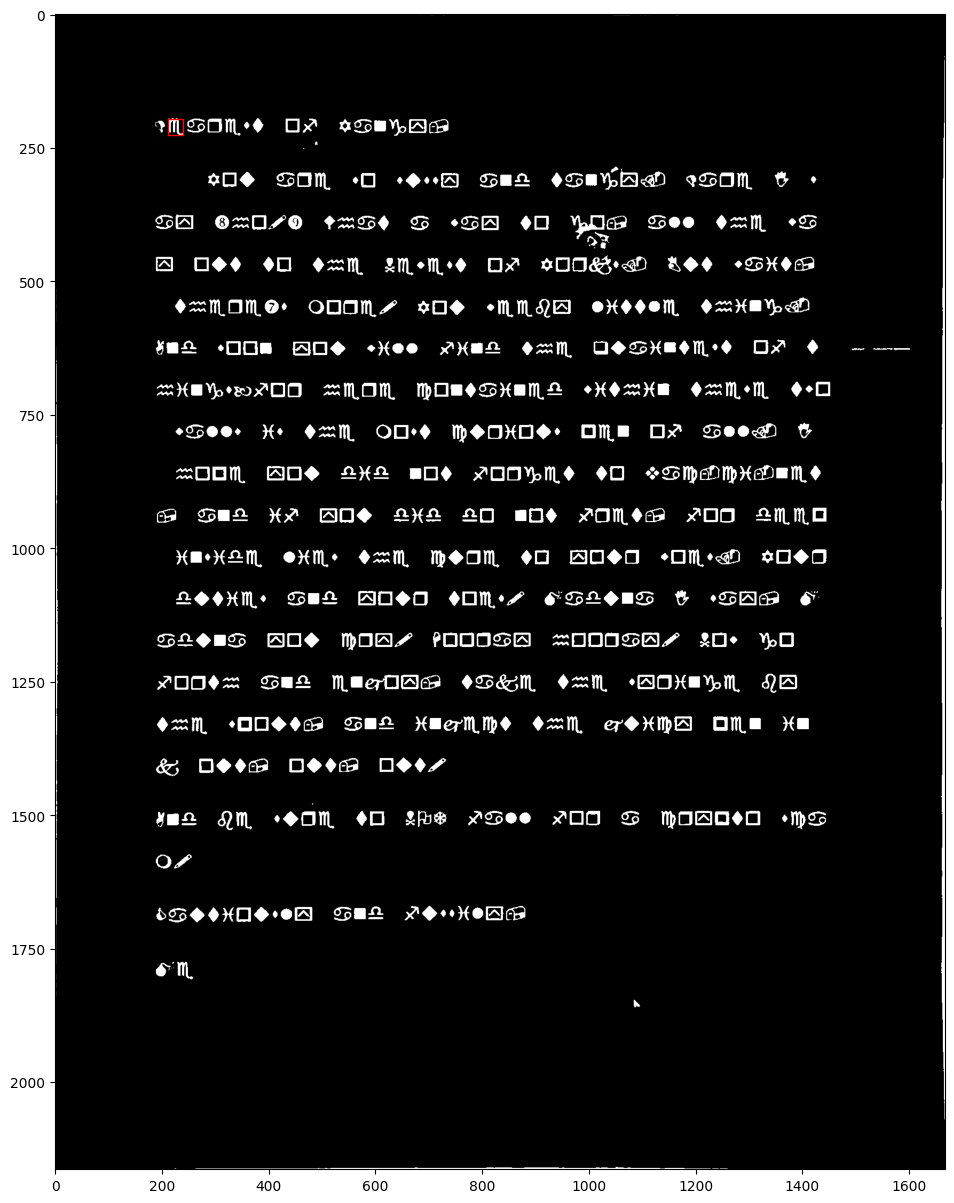

In [563]:
outline_char(0, 1)

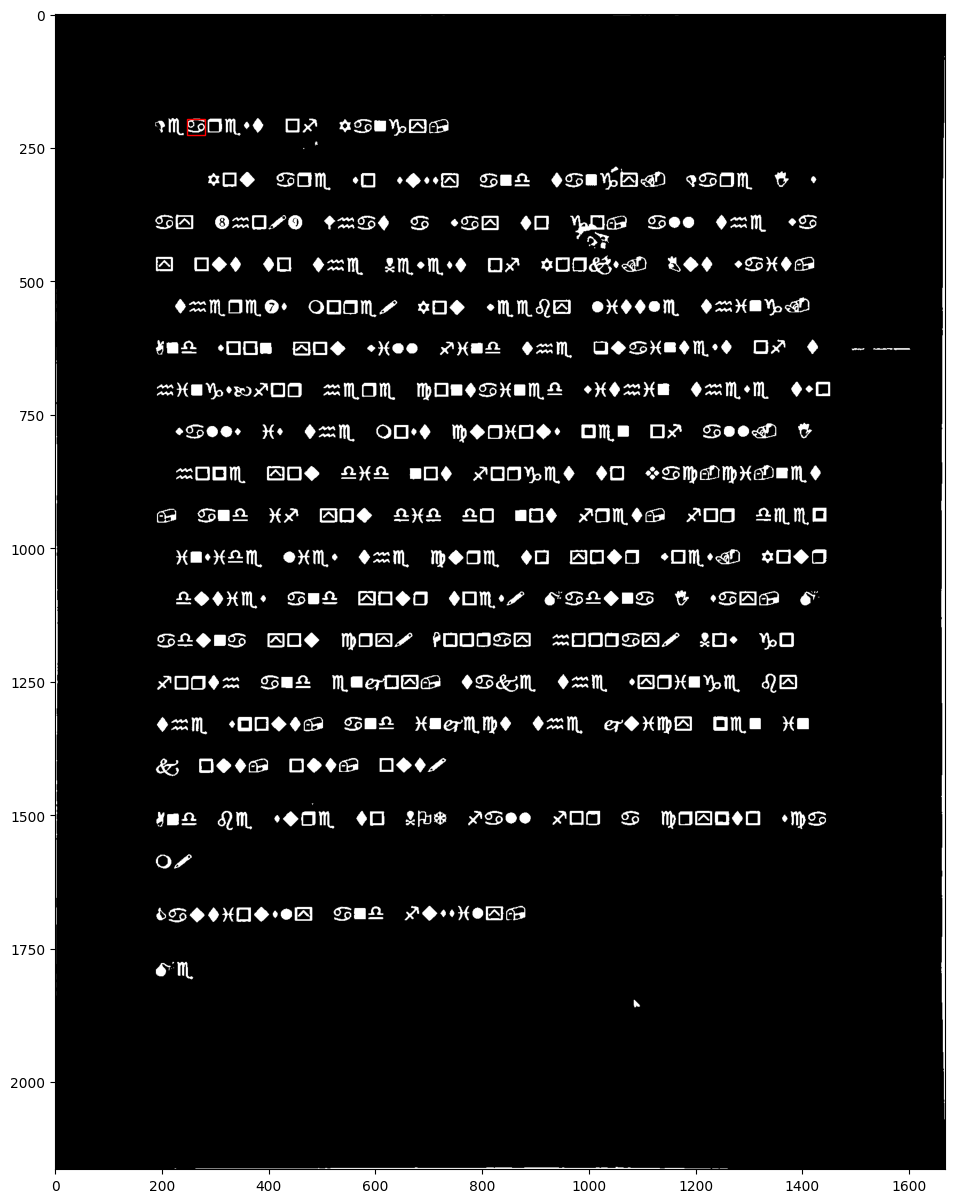

In [564]:
outline_char(0, 2)

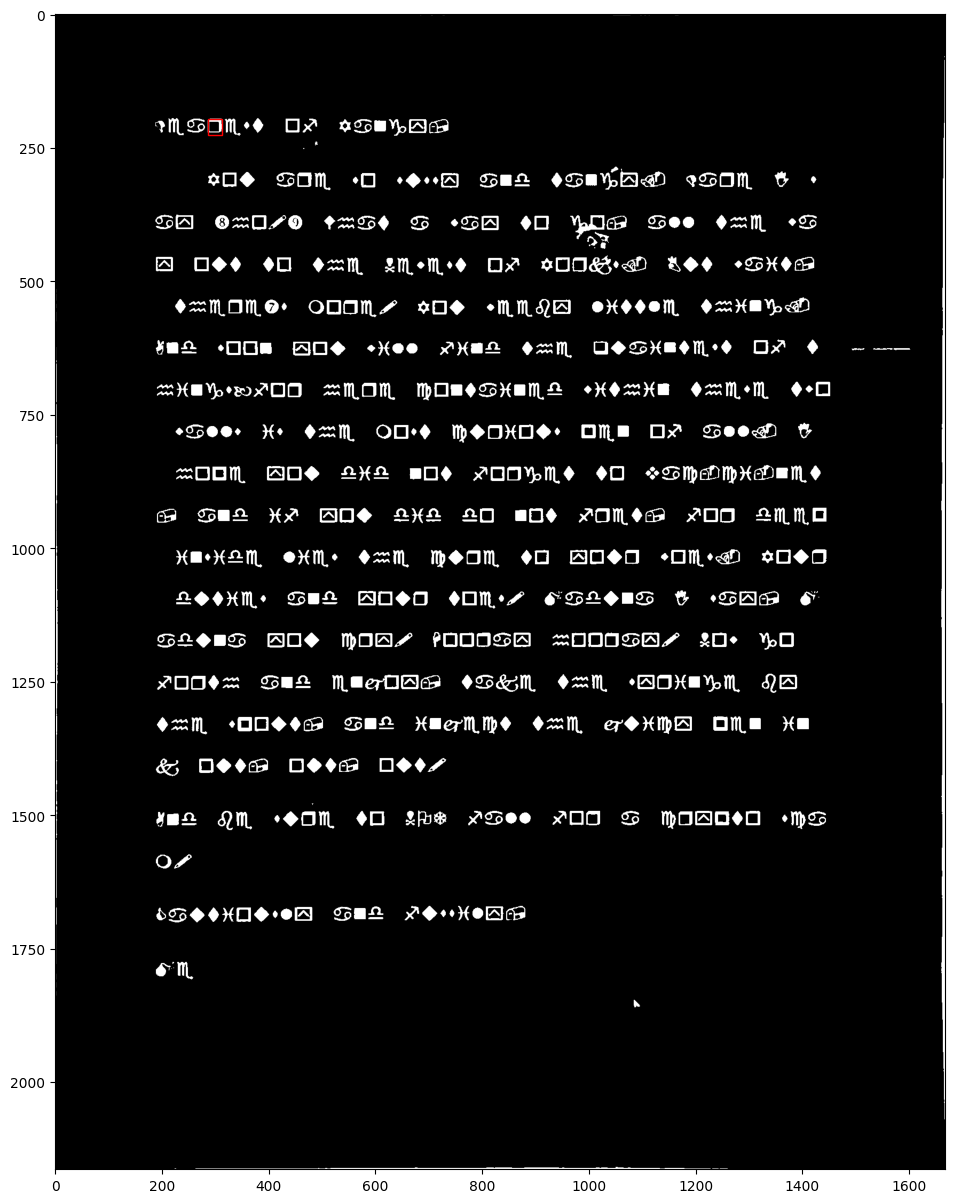

In [565]:
outline_char(0, 3)

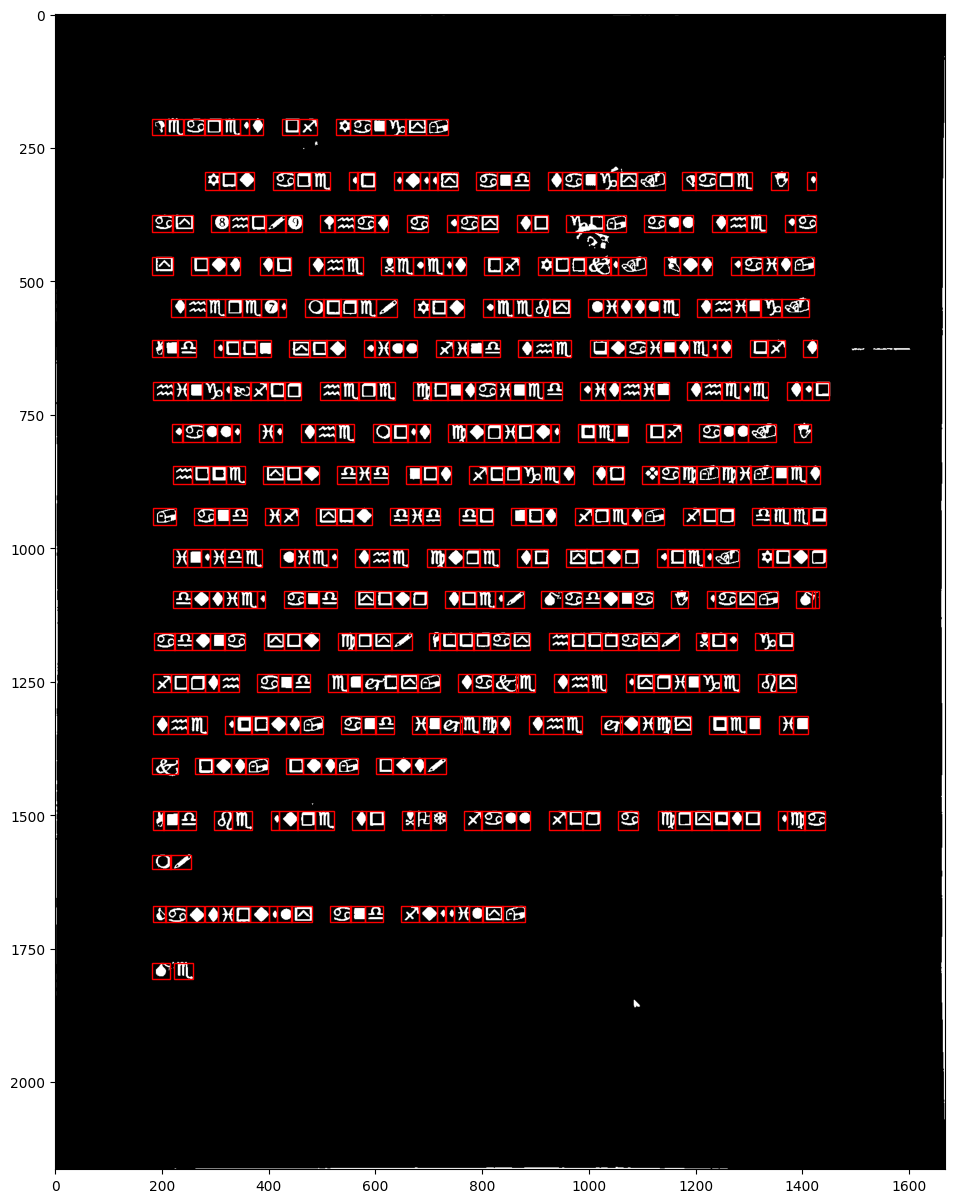

In [ ]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(scan, cmap="gray")
ax = plt.gca()
for i in range(len(line_ranges)):
    for j in range(len(vline_ranges[i])):
        ax.add_patch(
            Rectangle(
                (vline_ranges[i][j][0] - 7, line_ranges[i][0] - 1),
                vline_ranges[i][j][1] - vline_ranges[i][j][0] + 7,
                line_ranges[i][1] - line_ranges[i][0] + 2,
                linewidth=1,
                edgecolor="r",
                facecolor="none",
            )
        )
plt.show()

In [ ]:
snips = []
form = ""
for i in range(len(line_ranges)):
    for j in range(len(vline_ranges[i])):
        if j > 0 and vline_ranges[i][j][0] - vline_ranges[i][j - 1][1] > 15:
            snips.append(" ")
            form += " "
        snips.append(
            scan[
                line_ranges[i][0] - 7 : line_ranges[i][1],
                vline_ranges[i][j][0] - 1 : vline_ranges[i][j][1] + 1,
            ]
        )
        form += "X"
    snips.append("\n")
    form += "\n"

len(snips)

650

In [705]:
print(form)

XXXXXXX XX XXXXXX
XXX XXX XX XXXXX XXX XXXXXX XXXX X X
XX XXXXX XXXX X XXX XX XX XXX XXX XX
X XXX XX XXX XXXXXX XX XXXXXX XXX XXXXX
XXXXXXX XXXXX XXX XXXXX XXXXXX XXXXXX
XXX XXXX XXX XXXX XXXX XXX XXXXXXXXX XX X
XXXXXXXXX XXXX XXXXXXXXX XXXXXX XXXXX XXX
XXXXX XX XXX XXXX XXXXXXX XXX XX XXXX X
XXXX XXX XXX XXX XXXXXX XX XXXXXXXXXX
X XXX XX XXX XXX XX XXX XXXXX XXX XXXX
XXXXXX XXXX XXX XXXX XX XXXX XXXXX XXXX
XXXXXX XXX XXXX XXXXX XXXXXX X XXXX XX
XXXXX XXX XXXX XXXXXX XXXXXXX XXX XX
XXXXX XXX XXXXX XXXX XXX XXXXXXX XX
XXX XXXXXX XXX XXXXXX XXX XXXXX XXX XX
X XXXX XXXX XXXX
XXX XX XXXX XX XXX XXXX XXX X XXXXXX XXX
XX
XXXXXXXXXX XXX XXXXXXXX
XX



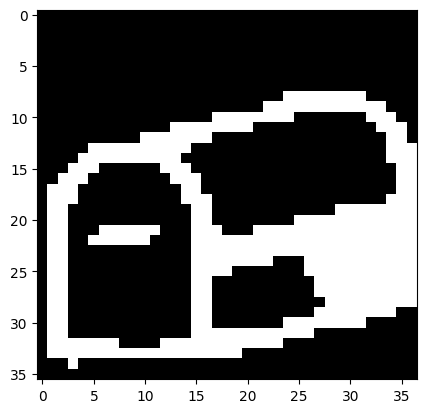

In [706]:
plt.imshow(snips[16], cmap="gray")

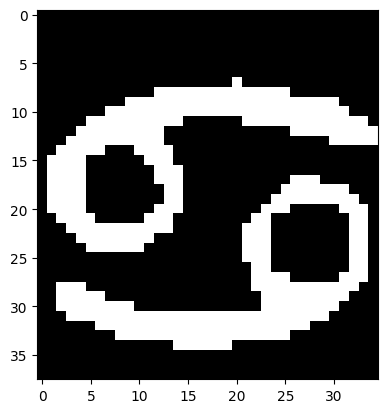

In [707]:
plt.imshow(snips[22], cmap="gray")

In [ ]:
for i in range(len(snips)):
    if isinstance(snips[i], str):
        continue
    while np.sum(snips[i][0]) == 0:
        snips[i] = snips[i][1:]
    while np.sum(snips[i][-1]) == 0:
        snips[i] = snips[i][:-1]
    while np.sum(snips[i][:, 0]) == 0:
        snips[i] = snips[i][:, 1:]
    while np.sum(snips[i][:, -1]) == 0:
        snips[i] = snips[i][:, :-1]

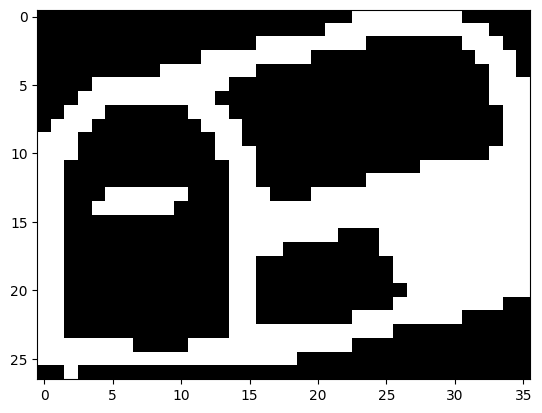

In [709]:
plt.imshow(snips[16], cmap="gray")

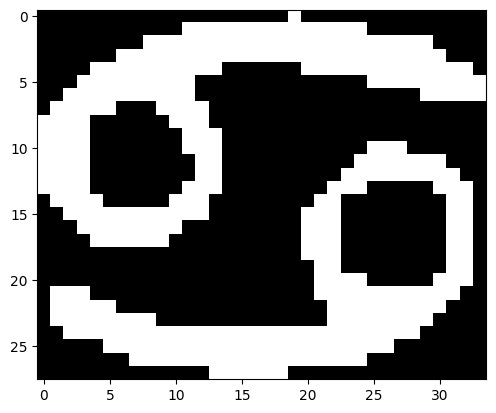

In [710]:
plt.imshow(snips[22], cmap="gray")

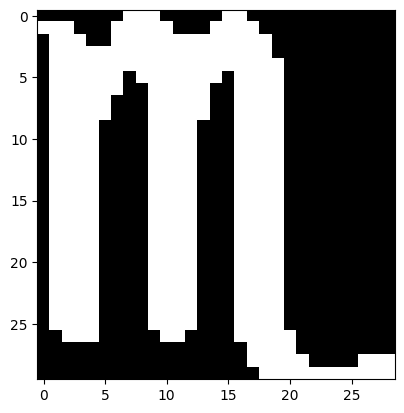

In [711]:
plt.imshow(snips[1], cmap="gray")

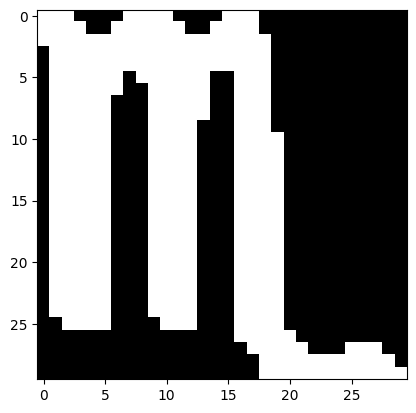

In [712]:
plt.imshow(snips[-2], cmap="gray")

In [713]:
print(snips[1].shape, snips[-2].shape)

(30, 29) (30, 30)


In [ ]:
for i in range(len(snips)):
    if isinstance(snips[i], str):
        continue
    while snips[i].shape[0] < 65:
        snips[i] = np.vstack(
            [[False] * snips[i].shape[1], snips[i], [False] * snips[i].shape[1]]
        )
    if snips[i].shape[0] > 65:
        snips[i] = snips[i][:-1]
    while snips[i].shape[1] < 65:
        snips[i] = np.hstack(
            [[[False]] * snips[i].shape[0], snips[i], [[False]] * snips[i].shape[0]]
        )
    if snips[i].shape[1] > 65:
        snips[i] = snips[i][:, :-1]

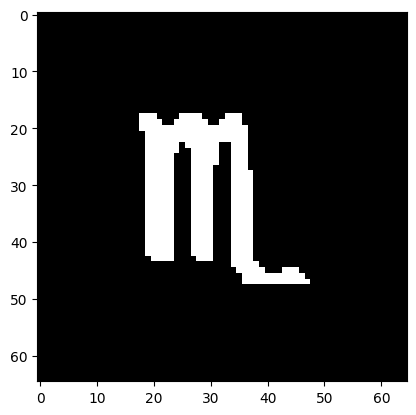

In [715]:
plt.imshow(snips[-2], cmap="gray")

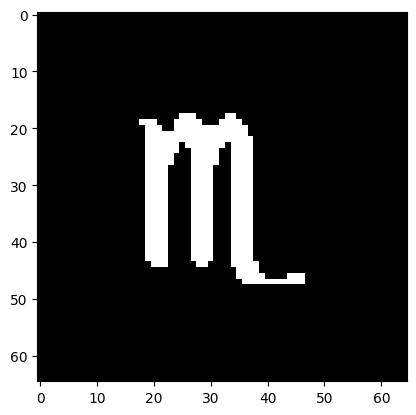

In [717]:
plt.imshow(snips[1], cmap="gray")

In [718]:
np.sum(snips[-2] * snips[1])

352

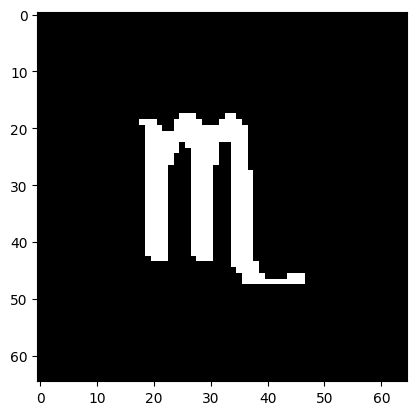

In [719]:
plt.imshow(snips[-2] * snips[1], cmap="gray")

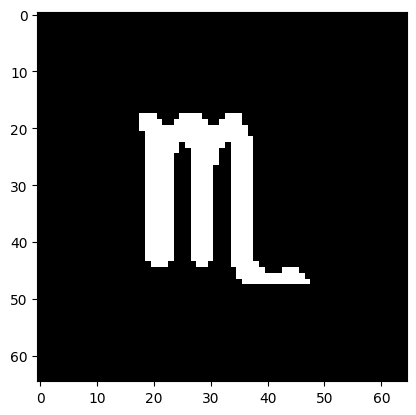

In [720]:
plt.imshow(snips[-2] + snips[1], cmap="gray")

In [ ]:
def iou_base(x, y):
    return np.sum(x * y) / np.sum(x + y)


def iou(x, y):
    X = []
    Y = []
    results = []
    for i in range(-5, 5):
        for j in range(-5, 5):
            results.append(
                iou_base(np.roll(np.roll(snips[x], i, axis=0), j, axis=1), snips[y])
            )
    #     X.append(np.vstack([np.roll(np.roll(snips[x], i, axis=1), j, axis=0)
    #                   for j in range(-5, 6)]))
    #     Y.append(np.vstack([snips[y]
    #                   for j in range(-5, 6)]))
    # X = np.hstack(X)
    # Y = np.hstack(Y)
    # print(X.shape, Y.shape)
    # return iou_base(X, Y)
    return max(results)

In [769]:
iou(1, 2)

0.25435540069686413

In [770]:
iou(2, 2)

1.0

In [771]:
iou(1, 4)

0.8469387755102041

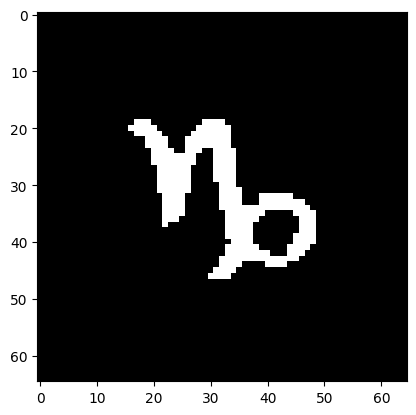

In [772]:
plt.imshow(snips[14], cmap="gray")

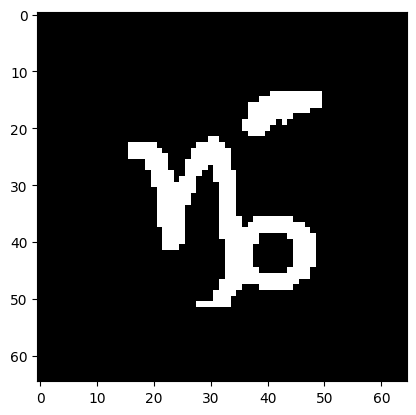

In [773]:
plt.imshow(snips[42], cmap="gray")

In [774]:
print(iou_base(snips[14], snips[42]), iou(14, 42))
print(iou_base(snips[15], snips[43]), iou(15, 43))

0.30812854442344045 0.71712158808933
0.2923673997412678 0.8263254113345521


In [ ]:
text = snips.copy()
legend = {
    "a": [2],
    "b": [583],
    "c": [609],
    "d": [37],
    "e": [1],
    "f": [9],
    "g": [14],
    "h": [65],
    "i": [627],
    "j": [540],
    "k": [562],
    "l": [643],
    "m": [620],
    "n": [13],
    "o": [8],
    "p": [612],
    "r": [3],
    "s": [5],
    "t": [6],
    "u": [20],
    "v": [321],
    "w": [107],
    "y": [15],
    "A": [579],
    "B": [122],
    "C": [623],
    "D": [0],
    "H": [465],
    "I": [440],
    "M": [647],
    "N": [594],
    "O": [595],
    "T": [596],
    "Y": [11],
    "-": [16],
    ",": [567],
    ".": [44],
    "!": [621],
}
# legend = {"a": [2], "d": [37], "e": [1], "f": [9], "M": [647]}
IOU_THRESH = 0

for i in range(len(snips)):
    if isinstance(text[i], str):
        continue

    large = IOU_THRESH
    alarge = -1
    for j in legend:
        iou_mean = np.mean([iou(i, k) for k in legend[j]])
        if iou_mean > large:
            large = iou_mean
            alarge = j
    if large > IOU_THRESH:
        text[i] = alarge
        # legend[alarge].append(i)
    else:
        text[i] = "_"

print("".join(text))

Dearest of Yangy-
You are so sussy and tangy. Dare I s
ay uho!u that a way to p, all the wa
y out to the Newest of Yorks. But wait-
thereus more! You weeby little thing.
And soon you will find the puaintest of t
hingsnfor here contained within these two
walls is the most curious pen of all. I
hope you did not forget to vac,ci,net
- and if you did do not fret- for deep
inside lies the cure to your woes. Your
duties and your toes! Maduna I say, Ms
aduna you cry! Hooray hooray! Now go
forth and en.y- take the syringe by
the spout, and inject the juicy pen in
k out, out, out!
And be sure to NOT fall for a crypto sca
m!
Cautiously and fussily,
Me



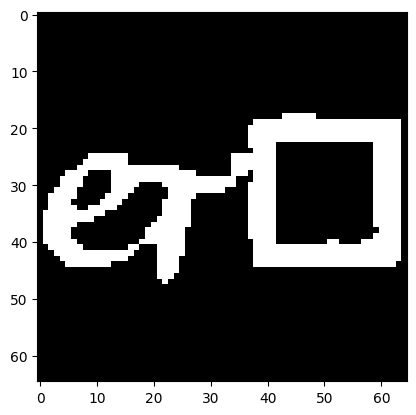

In [831]:
plt.imshow(snips[499], cmap="gray")

In [832]:
prev = 0
for i in range(len(text)):
    print(str(i).zfill(3), end=" ")
    if text[i] == "\n":
        print()
        for j in range(prev, i):
            print(" " + text[j] + " ", end=" ")
        print()
        print()
        prev = i + 1

000 001 002 003 004 005 006 007 008 009 010 011 012 013 014 015 016 017 
 D   e   a   r   e   s   t       o   f       Y   a   n   g   y   -  

018 019 020 021 022 023 024 025 026 027 028 029 030 031 032 033 034 035 036 037 038 039 040 041 042 043 044 045 046 047 048 049 050 051 052 053 054 
 Y   o   u       a   r   e       s   o       s   u   s   s   y       a   n   d       t   a   n   g   y   .       D   a   r   e       I       s  

055 056 057 058 059 060 061 062 063 064 065 066 067 068 069 070 071 072 073 074 075 076 077 078 079 080 081 082 083 084 085 086 087 088 089 090 091 
 a   y       u   h   o   !   u       t   h   a   t       a       w   a   y       t   o       p   ,       a   l   l       t   h   e       w   a  

092 093 094 095 096 097 098 099 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 
 y       o   u   t       t   o       t   h   e       N   e   w   e   s   t       o   f       Y   o   r   k

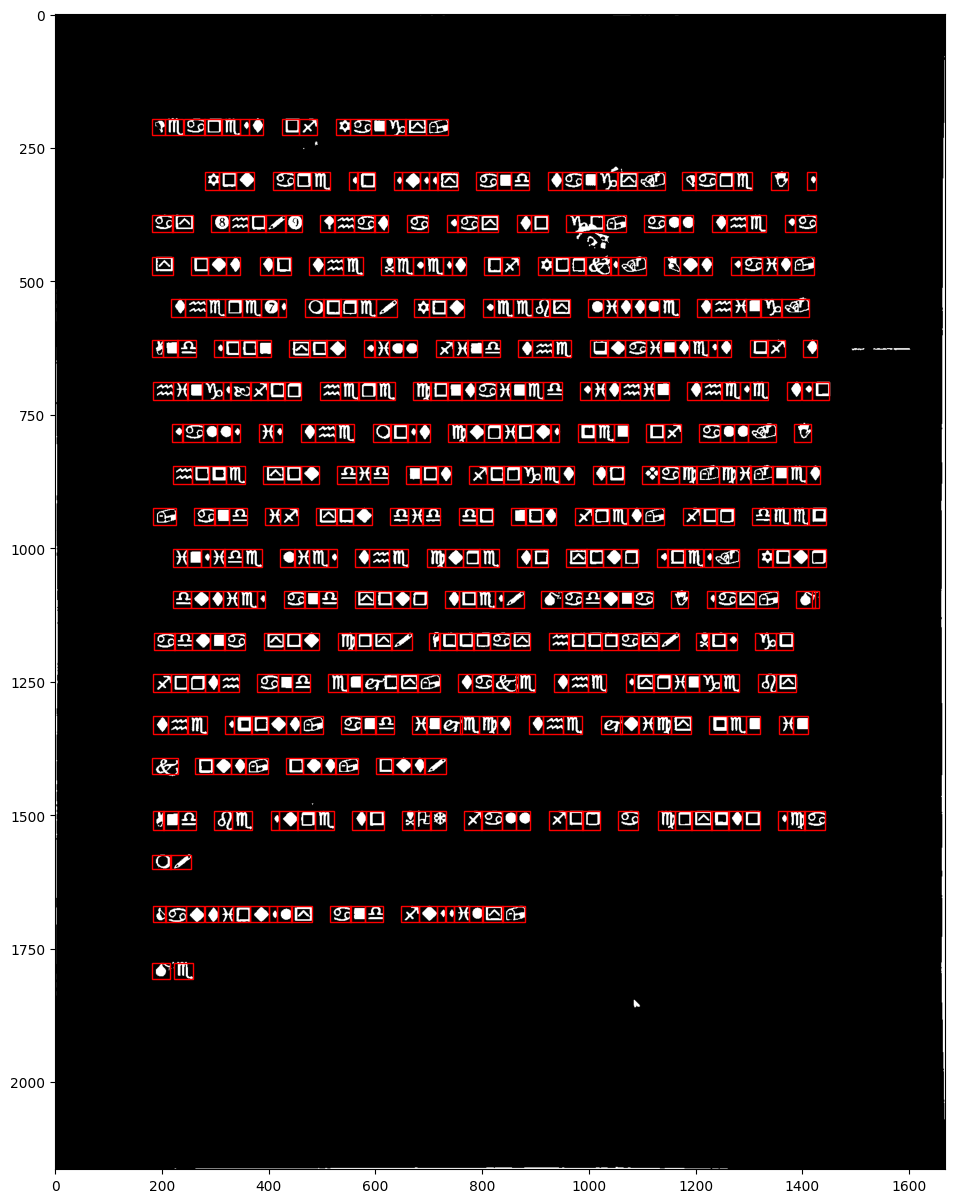

In [ ]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(scan, cmap="gray")
ax = plt.gca()
for i in range(len(line_ranges)):
    for j in range(len(vline_ranges[i])):
        ax.add_patch(
            Rectangle(
                (vline_ranges[i][j][0] - 7, line_ranges[i][0] - 1),
                vline_ranges[i][j][1] - vline_ranges[i][j][0] + 7,
                line_ranges[i][1] - line_ranges[i][0] + 2,
                linewidth=1,
                edgecolor="r",
                facecolor="none",
            )
        )
plt.show()

In [834]:
result = "".join(text)
print(result)

Dearest of Yangy-
You are so sussy and tangy. Dare I s
ay uho!u that a way to p, all the wa
y out to the Newest of Yorks. But wait-
thereus more! You weeby little thing.
And soon you will find the puaintest of t
hingsnfor here contained within these two
walls is the most curious pen of all. I
hope you did not forget to vac,ci,net
- and if you did do not fret- for deep
inside lies the cure to your woes. Your
duties and your toes! Maduna I say, Ms
aduna you cry! Hooray hooray! Now go
forth and en.y- take the syringe by
the spout, and inject the juicy pen in
k out, out, out!
And be sure to NOT fall for a crypto sca
m!
Cautiously and fussily,
Me

